In [1]:
require(ISLR)
require(boot)

Loading required package: ISLR
Loading required package: boot


In [2]:
?cv.glm

cv.glm {boot},R Documentation
data,"A matrix or data frame containing the data. The rows should be cases and the columns correspond to variables, one of which is the response."
glmfit,"An object of class ""glm"" containing the results of a generalized linear model fitted to data."
cost,A function of two vector arguments specifying the cost function for the cross-validation. The first argument to cost should correspond to the observed responses and the second argument should correspond to the predicted or fitted responses from the generalized linear model. cost must return a non-negative scalar value. The default is the average squared error function.
K,The number of groups into which the data should be split to estimate the cross-validation prediction error. The value of K must be such that all groups are of approximately equal size. If the supplied value of K does not satisfy this criterion then it will be set to the closest integer which does and a warning is generated specifying the value of K used. The default is to set K equal to the number of observations in data which gives the usual leave-one-out cross-validation.
call,The original call to cv.glm.
K,The value of K used for the K-fold cross validation.
delta,A vector of length two. The first component is the raw cross-validation estimate of prediction error. The second component is the adjusted cross-validation estimate. The adjustment is designed to compensate for the bias introduced by not using leave-one-out cross-validation.
seed,The value of .Random.seed when cv.glm was called.


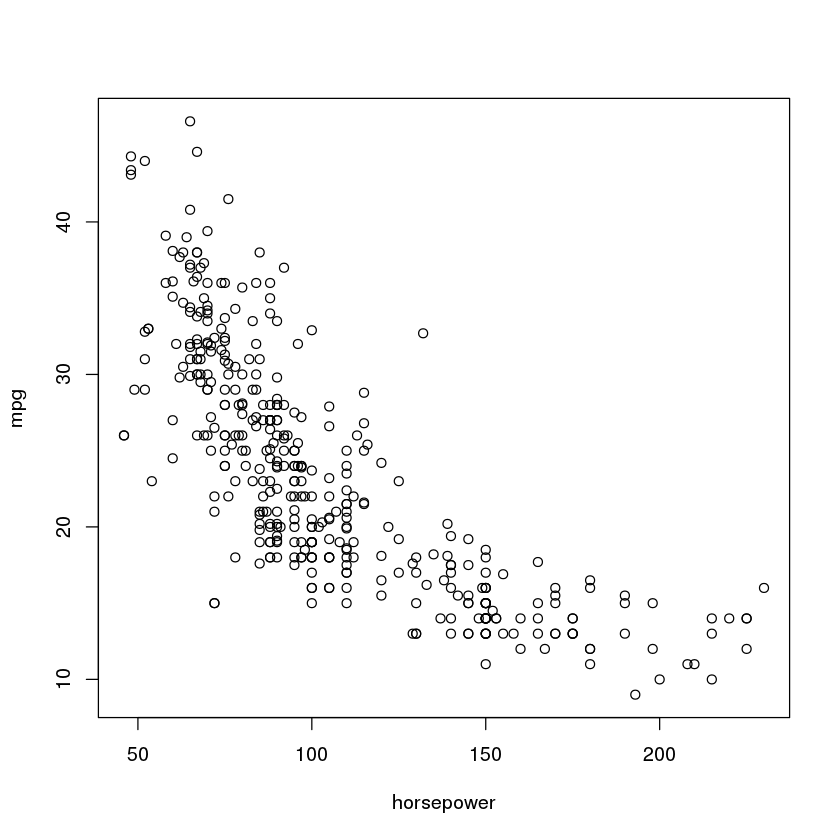

In [3]:
plot(mpg~horsepower,data=Auto)

In [4]:
glm.fit = glm(mpg~horsepower, data=Auto)

In [5]:
summary(glm.fit)


Call:
glm(formula = mpg ~ horsepower, data = Auto)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-13.5710   -3.2592   -0.3435    2.7630   16.9240  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 24.06645)

    Null deviance: 23819.0  on 391  degrees of freedom
Residual deviance:  9385.9  on 390  degrees of freedom
AIC: 2363.3

Number of Fisher Scoring iterations: 2


In [6]:
cv.glm(Auto, glm.fit)$delta

[1] 24.23151 24.23114

In [7]:
loocv = function(fit){
    h = lm.influence(fit)$h
    mean((residuals(fit)/(1-h))^2)
}
residuals(glm.fit)[0:5]

1          2          3          4          5 
-1.4160457  1.1085200  1.7408490 -0.2591510 -0.8375984

In [8]:
loocv(glm.fit)

[1] 24.23151

In [9]:
cv.error <- rep(0,5)
degree <- 1:5

In [10]:
for(d in degree){
    glm.fit = glm(mpg~poly(horsepower,d), data=Auto)
    cv.error[d] = loocv(glm.fit)
}

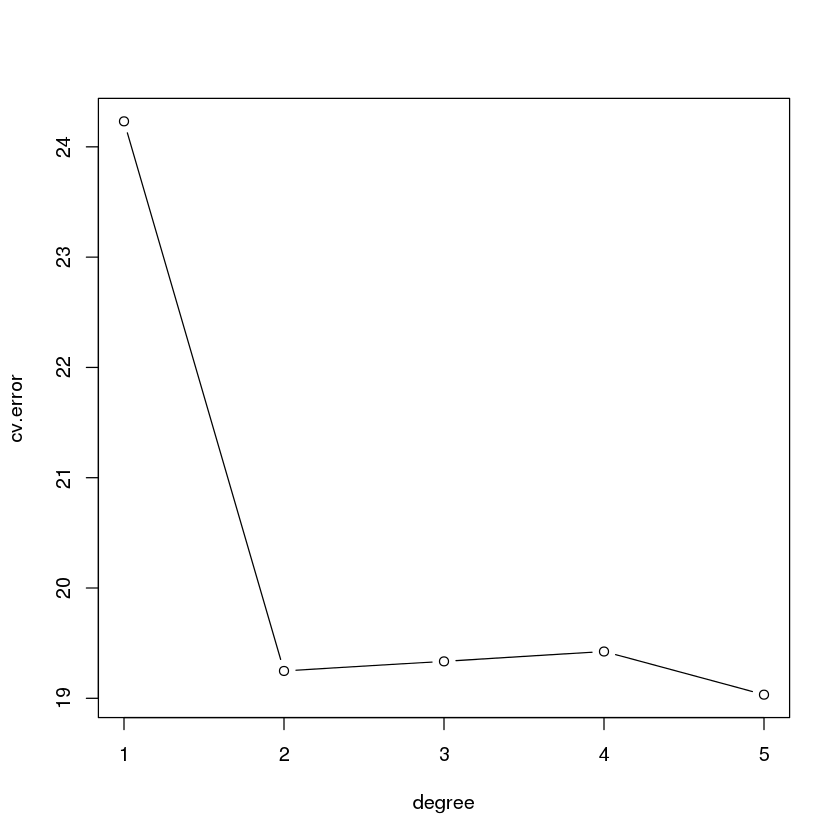

In [11]:
plot(degree, cv.error, type='b')

In [16]:
cv.error10 <- rep(0,5)
for(d in degree){
    glm.fit = glm(mpg~poly(horsepower,d), data=Auto)
    cv.error10[d] = cv.glm(Auto, glm.fit, K=10)$delta[1]
}

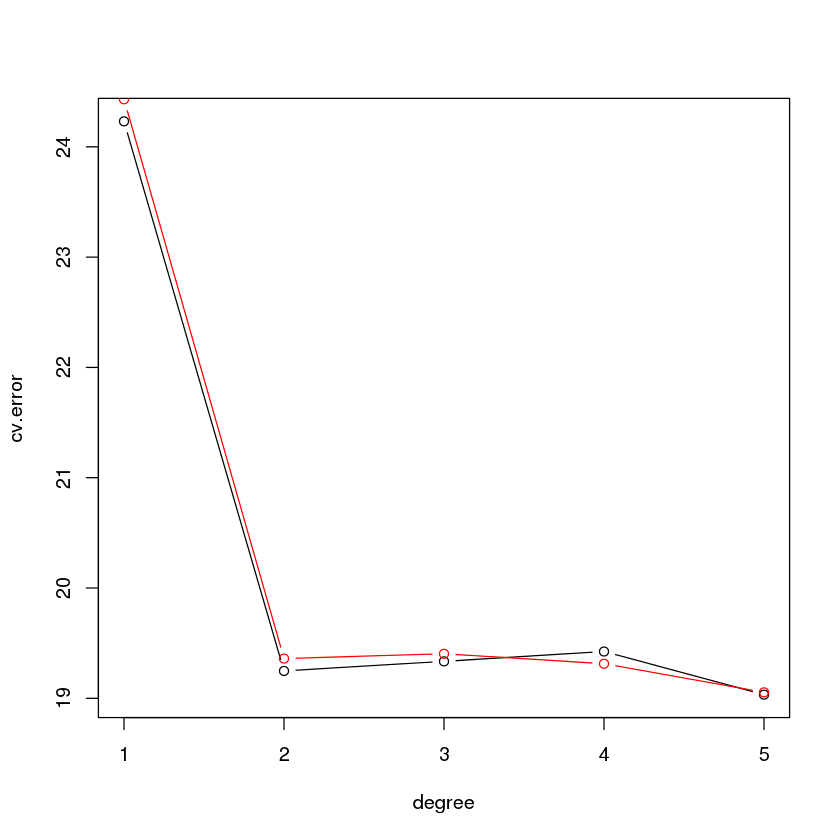

In [17]:
plot(degree, cv.error, type='b')
lines(degree, cv.error10, type='b', col='red')

In [18]:
alpha <- function(x,y){
    vx = var(x)
    vy = var(y)
    cxy = cov(x,y)
    (vy - cxy)/(vx+vy-2*cxy)
}

In [25]:
alpha(Portfolio$X,Portfolio$Y)

[1] 0.5758321

In [23]:
alpha.fn <- function(data, index){
    with(data[index,],alpha(X,Y))
}

In [24]:
alpha.fn(Portfolio,1:100)

[1] 0.5758321

In [26]:
boot.out=boot(Portfolio,alpha.fn,R=1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original      bias    std. error
t1* 0.5758321 0.001633045  0.09125992

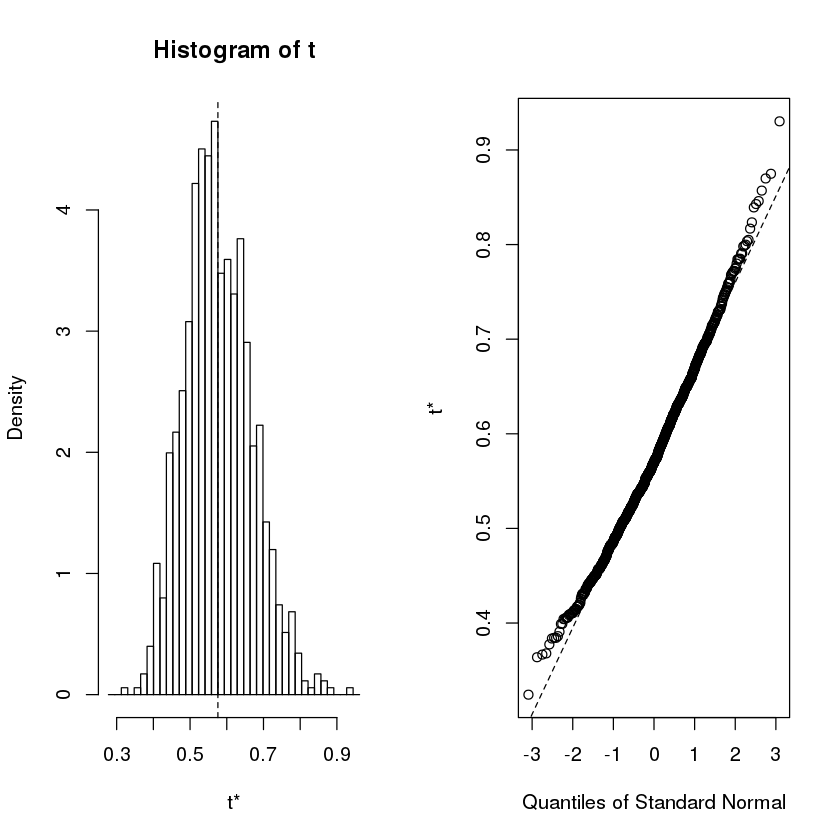

In [27]:
boot.out
plot(boot.out)

In [32]:
# from Ch5 Lab

set.seed(1)
train = sample(392,196)

In [33]:
lm.fit = lm(mpg~horsepower,data=Auto, subset=train)

In [34]:
attach(Auto)

The following objects are masked from Auto (pos = 3):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year



In [35]:
mean((mpg-predict(lm.fit,Auto))[-train]^2)

[1] 26.14142

In [36]:
# I personally like this one better
mean((mpg[-train]-predict(lm.fit,Auto[-train,]))^2)

[1] 26.14142

In [37]:
lm.fit2 = lm(mpg~poly(horsepower,2),data=Auto, subset=train)
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

[1] 19.82259

In [38]:
lm.fit3 = lm(mpg~poly(horsepower,3),data=Auto, subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 19.78252

In [39]:
set.seed(2)
train = sample(392,196)
lm.fit = lm(mpg~horsepower, data=Auto, subset=train)
mean((mpg-predict(lm.fit,Auto))[-train]^2)

[1] 23.29559

In [40]:
lm.fit2 = lm(mpg~poly(horsepower,2), data=Auto, subset=train)
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

[1] 18.90124

In [41]:
lm.fit3 = lm(mpg~poly(horsepower,3), data=Auto, subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 19.2574

In [42]:
glm.fit = glm(mpg~horsepower, data=Auto)
cv.err <- cv.glm(Auto,glm.fit)
cv.err$delta

[1] 24.23151 24.23114

In [43]:
cv.error <- rep(0,5)
for (i in 1:5) {
    glm.fit <- glm(mpg~poly(horsepower,i), data=Auto)
    cv.error[i] <- cv.glm(Auto,glm.fit)$delta[1]
}
cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321

In [49]:
load('../Data/5.R.RData')
alpha.fn <- function(data, index) {
    X <- data$X[index]
    Y <- data$Y[index]
    return((var(Y) - cov(X,Y))/(var(X)+var(Y)-2*cov(X,Y)))
}

In [50]:
alpha.fn(Portfolio, 1:100)

[1] 0.5758321

In [51]:
set.seed(1)
alpha.fn(Portfolio, sample(100,100,replace=T))

[1] 0.5963833

In [52]:
boot(Portfolio, alpha.fn, R=1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.5758321 -7.315422e-05  0.08861826

In [53]:
boot.fn <- function(data, index){
    return(coef(lm(mpg~horsepower,data=data,subset=index)))
}

In [54]:
boot.fn(Auto,1:392)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [55]:
set.seed(1)
boot.fn(Auto,sample(392,392,replace=T))
boot.fn(Auto,sample(392,392,replace=T))

(Intercept)  horsepower 
 38.7387134  -0.1481952

(Intercept)  horsepower 
 40.0383086  -0.1596104

In [56]:
boot(Auto, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
      original      bias    std. error
t1* 39.9358610  0.02972191 0.860007896
t2* -0.1578447 -0.00030823 0.007404467

In [57]:
boot.fn <- function(data,index){
    return(coef(lm(mpg~horsepower+I(horsepower^2), data=data, subset=index)))
}
set.seed(1)
boot(Auto, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias     std. error
t1* 56.900099702  6.098115e-03 2.0944855842
t2* -0.466189630 -1.777108e-04 0.0334123802
t3*  0.001230536  1.324315e-06 0.0001208339

In [58]:
summary(glm(mpg~poly(horsepower,2, raw=T), data=Auto))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),5.690010e+01,1.800427e+00,3.160367e+01,1.740911e-109
"poly(horsepower, 2, raw = T)1",-4.661896e-01,3.112462e-02,-1.497816e+01,2.289429e-40
"poly(horsepower, 2, raw = T)2",1.230536e-03,1.220759e-04,1.008009e+01,2.196340e-21


In [59]:
head(Xy)

,X1,X2,y
1,1.29772,0.8059212,0.2989683
2,1.267323,0.7990341,0.3181337
3,1.236882,0.7921693,0.3372015
4,1.206317,0.7852963,0.356121
5,1.175553,0.7783848,0.3748415
6,1.144513,0.7714042,0.3933122


In [60]:
summary(lm(y~X1+X2, data=Xy))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.658349e-01,1.988032e-02,1.337176e+01,1.249278e-37
X1,1.453263e-01,2.593295e-02,5.603925e+00,2.711026e-08
X2,3.133670e-01,2.922671e-02,1.072194e+01,1.843565e-25


In [61]:
2.593e-02

[1] 0.02593

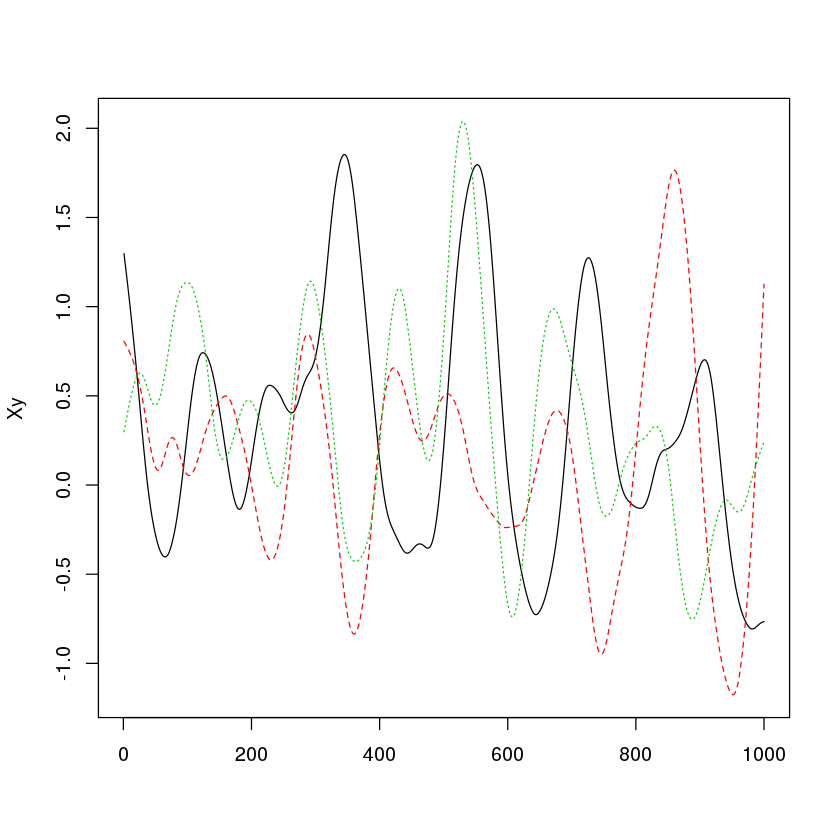

In [62]:
matplot(Xy,type="l")

In [63]:
boot.fn <- function(data,index){
    return(coef(lm(y~X1+X2, data=data, subset=index)))
}
set.seed(1)
boot(Xy, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Xy, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.2658349  0.0005308828  0.01382940
t2* 0.1453263  0.0001788849  0.02874028
t3* 0.3133670 -0.0007080959  0.03684051

In [64]:
tsboot(tsXy,boot.fn, 1000)

ERROR: Error in tsboot(tsXy, boot.fn, 1000): object 'tsXy' not found


In [65]:
new.rows = c(101:200, 401:500, 101:200, 901:1000, 301:400, 1:100, 1:100, 801:900, 201:300, 701:800)
new.Xy = Xy[new.rows, ]

In [66]:
#sample(0:9,10,replace=T)
gen_ix <- function(){
    ix <- c()
    for (i in sample(0:9,10,replace=T)){
        start <- i*100 + 1
        end <- (i+1)*100
        ix <- c(ix, start:end)
    }
    return(ix)
}

In [67]:
boot.fn <- function(data){
    return(coef(lm(y~X1+X2, data=data, subset=gen_ix())))
}

In [68]:
betas <- rep(0,1000)
for (i in 1:1000){
    betas[i] = boot.fn(Xy)['X1']
}

In [69]:
mean(betas)

[1] 0.1477075

In [70]:
sd(betas)

[1] 0.2020519